In [10]:
import numpy as np # linear algebra
import pandas as pd

In [11]:
df = pd.read_csv("news.csv")
df

,date,text,label
0,2018-01-04T15:35:56,Farmers will get subsidies for turning fields ...,politic
1,2018-01-04T15:35:57,Vanuatu bans non-biodegradable plastic to prot...,politic
2,2018-01-04T17:00:49,Ex-British PM Tony Blair ups calls for Labour ...,politic
3,2018-01-04T17:00:50,UK's Tony Blair argues voters deserve another ...,politic
4,2018-01-04T18:01:34,Germany had so much renewable energy over Chri...,politic
...,...,...,...
127388,2024-03-30T21:54:34,Wind generates record annual percentage of UK ...,technology
127389,2024-03-30T22:54:55,"HP ends ties with Russia, shutting down its Ru...",technology
127390,2024-03-30T23:24:43,AT&T confirms data for 73 million customers le...,technology
127391,2024-03-31T00:59:36,Missouri AG sues Media Matters as Republicans ...,technology


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127393 entries, 0 to 127392
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    127393 non-null  object
 1   text    127375 non-null  object
 2   label   127393 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


checking missing Data

In [13]:
# Checking for missing values
missing_data = df.isnull().sum()
missing_data

date      0
text     18
label     0
dtype: int64

Data cleaning and spilting

In [14]:

# Remove rows where 'text' is missing
data_clean = df.dropna(subset=['text'])

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_clean['text'], data_clean['label'], test_size=0.2, random_state=42
)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape



((101900,), (25475,))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pipeline for TF-IDF Vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(random_state=42))
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting the test set
y_pred = pipeline.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
accuracy, precision, recall, conf_matrix

(0.861000981354269,
 0.8606439102300856,
 0.861000981354269,
 array([[9696,  416,  717],
        [ 386, 6838,  566],
        [ 753,  703, 5400]]))

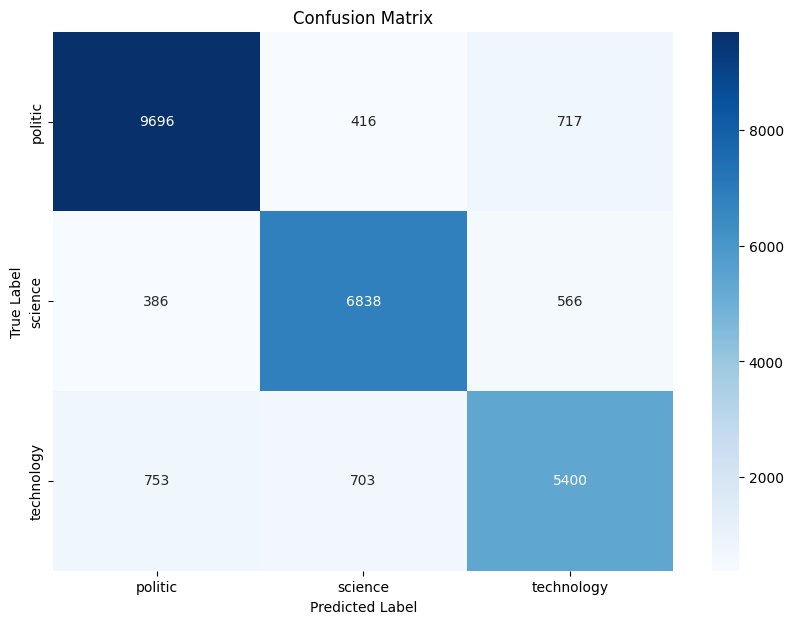

In [16]:
# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
import pickle
# save model
with open('text_classification_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [18]:
# import streamlit as st
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# # loading model
# model = pickle.load(open("text_classification_model.pkl", "rb"))

# def classify_news(text):
#     prediction = model.predict([text])
#     return prediction[0]

# def main():
#     st.title("News Classify Model")
#     st.write("Classify news and predict its categories")
    
#     news_text = st.text_area("Input news", "")
    
#     if st.button("Classify"):
#         label = classify_news(news_text)
#         st.write(f"The category of this news is: {label}")

# if __name__ == "__main__":
#     main()